---
title: 1 - Why Python for Finance?
subtitle: Introduction to Python for Finance
---

# Why Python for Finance?

## Zen of Python

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## The Python Ecosystem

In [2]:
100 * 2.5 + 50

300.0

In [3]:
# causes intentional error
# log(1)  

In [4]:
import math  

In [5]:
math.log(1)  

0.0

## Finance and Python Syntax

In [6]:
import math
import numpy as np  

In [7]:
S0 = 100.  
K = 105.
T = 1.0  
r = 0.05  
sigma = 0.2  

In [8]:
I = 100000  

In [9]:
np.random.seed(1000)  

In [10]:
z = np.random.standard_normal(I)  

In [11]:
ST = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * math.sqrt(T) * z)  

In [12]:
hT = np.maximum(ST - K, 0)  

In [13]:
C0 = math.exp(-r * T) * np.mean(hT)  

In [14]:
print('Value of the European call option: {:5.3f}.'.format(C0))  

Value of the European call option: 8.019.


In [15]:
%run bsm_mcs_euro.py

Value of the European call option 7.989.


## Idioms & Paradigms

In [21]:
import math
loops = 2500000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]

576 ms ± 5.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

26 ms ± 988 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

25.5 ms ± 480 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

7.25 ms ± 170 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Data-Driven & AI-First Finance

### Data-Driven Finance 

**This sub-section requires a license for Eikon. Therefore no code is provided.**

### AI-First Finance 

In [25]:
import numpy as np
import pandas as pd

In [26]:
data = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)
data = pd.DataFrame(data['AAPL.O'])  
data['Returns'] = np.log(data / data.shift())  
data.dropna(inplace=True)

In [27]:
lags = 6

In [28]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))  
    cols.append(col)
data.dropna(inplace=True)

In [29]:
from sklearn.svm import SVC

In [30]:
model = SVC(gamma='scale')  

In [31]:
model.fit(data[cols], np.sign(data['Returns']))  

SVC()

In [32]:
data['Prediction'] = model.predict(data[cols])  

In [33]:
data['Strategy'] = data['Prediction'] * data['Returns']  

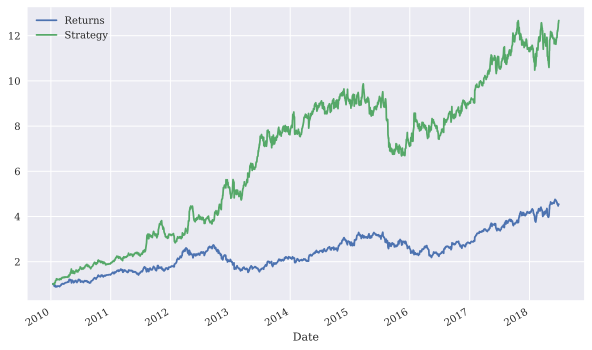

In [34]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));  